<a href="https://colab.research.google.com/github/atreGanesh15/Deep-Learning/blob/main/DL_ASS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DL Assignment 2 - Pretrained Model**

**Course Name:** Deep Learning

**Lab Title:** Image Classification by Transfer Learning using Pre-Trained CNN Models

**Student Name:** Ganesh Atre

**Student ID:** 202201040068

**Group Members**
- Ganesh Atre
- Mayur Kapgate
- Anirudha Gapat

# **Task 1 : Research Paper Selection and Dataset Preparation**

# **Research Paper Selection**
The abstract describes an image classification study using several pre-trained models. The paper involves using models like **VGG16**, **Densenet**, **Mobilenet**, **Inception V3**, **ResNet50**, and **Xception** for classification on the **Wang dataset**, which consists of 1000 images across 10 categories.

---

# **Dataset Selection**

### **Dataset Link & Description**:

https://www.kaggle.com/datasets/zalando-research/fashionmnist

# **Binary classification**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Expand dimensions to match CNN input shape (28,28,1)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Selecting class "Sneaker" (label 7) and merging others into "Not Sneaker" (label 1)
y_train_binary = np.where(y_train == 7, 0, 1)
y_test_binary = np.where(y_test == 7, 0, 1)

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train_binary, epochs=5, validation_data=(x_test, y_test_binary), batch_size=64)

# Model summary
model.summary()

# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test_binary, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 44s 42ms/step - accuracy: 0.9634 - loss: 0.0949 - val_accuracy: 0.9877 - val_loss: 0.0312
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 31s 32ms/step - accuracy: 0.9896 - loss: 0.0279 - val_accuracy: 0.9915 - val_loss: 0.0234
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.9927 - loss: 0.0197 - val_accuracy: 0.9905 - val_loss: 0.0251
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.9936 - loss: 0.0173 - val_accuracy: 0.9930 - val_loss: 0.0208
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 44s 37ms/step - accuracy: 0.9943 - loss: 0.0159 - val_accuracy: 0.9887 - val_loss: 0.0329


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 721,157 (2.75 MB)

 Trainable params: 240,385 (939.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 480,772 (1.83 MB)

313/313 - 2s - 5ms/step - accuracy: 0.9887 - loss: 0.0329
Test Accuracy: 0.9887


# **Multiclass classification**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Expand dimensions to match CNN input shape (28,28,1) for grayscale images
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Normalize pixel values to [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to categorical (one-hot encoding)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Build CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # Multiclass classification (10 classes)
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), batch_size=64)

# Model summary
model.summary()

# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 34s 35ms/step - accuracy: 0.7315 - loss: 0.7349 - val_accuracy: 0.8653 - val_loss: 0.3727
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 35ms/step - accuracy: 0.8750 - loss: 0.3450 - val_accuracy: 0.8926 - val_loss: 0.2979
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 34ms/step - accuracy: 0.8968 - loss: 0.2791 - val_accuracy: 0.9005 - val_loss: 0.2811
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 33ms/step - accuracy: 0.9096 - loss: 0.2465 - val_accuracy: 0.8984 - val_loss: 0.2784
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 34ms/step - accuracy: 0.9188 - loss: 0.2193 - val_accuracy: 0.9028 - val_loss: 0.2692


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 724,640 (2.76 MB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 483,094 (1.84 MB)

313/313 - 2s - 5ms/step - accuracy: 0.9028 - loss: 0.2692
Test Accuracy: 0.9028


# **Task 2 : Model Implementation and Fine-tuning**

# **Transfer Learning pre-trained models**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, applications
from tensorflow.keras.datasets import fashion_mnist
import numpy as np

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Expand dimensions to match CNN input shape (28,28,1) for grayscale images
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Convert grayscale images to 3-channel (RGB) images for pre-trained models
x_train = np.repeat(x_train, 3, axis=-1)
x_test = np.repeat(x_test, 3, axis=-1)

# Resize images to 32x32 to match pre-trained model input size
x_train = tf.image.resize(x_train, (32, 32))
x_test = tf.image.resize(x_test, (32, 32))

# Normalize pixel values to [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to categorical (one-hot encoding)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Function to create a model with Transfer Learning
def create_pretrained_model(base_model):
    base_model.trainable = False  # Freeze base model layers
    model = keras.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')  # 10 classes
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Load pre-trained models (without top layers)
vgg16_base = applications.VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
resnet50_base = applications.ResNet50(weights='imagenet', include_top=False, input_shape=(32,32,3))
mobilenet_base = applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(32,32,3))

# Create models
vgg16_model = create_pretrained_model(vgg16_base)
resnet50_model = create_pretrained_model(resnet50_base)
mobilenet_model = create_pretrained_model(mobilenet_base)

# Train models
history_vgg16 = vgg16_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), batch_size=64)
history_resnet50 = resnet50_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), batch_size=64)
history_mobilenet = mobilenet_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), batch_size=64)

# Model summaries
print("\nVGG16 Model Summary:")
vgg16_model.summary()

print("\nResNet50 Model Summary:")
resnet50_model.summary()

print("\nMobileNetV2 Model Summary:")
mobilenet_model.summary()

# Evaluate models
print("\nVGG16 Accuracy:")
vgg16_model.evaluate(x_test, y_test)

print("\nResNet50 Accuracy:")
resnet50_model.evaluate(x_test, y_test)

print("\nMobileNetV2 Accuracy:")
mobilenet_model.evaluate(x_test, y_test)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


<ipython-input-1-6f890981fe6d>:44: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet_base = applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(32,32,3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 20ms/step - accuracy: 0.7432 - loss: 0.7698 - val_accuracy: 0.8344 - val_loss: 0.4576
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.8445 - loss: 0.4256 - val_accuracy: 0.8476 - val_loss: 0.4267
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.8579 - loss: 0.3882 - val_accuracy: 0.8548 - val_loss: 0.4077
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.8662 - loss: 0.3643 - val_accuracy: 0.8505 - val_loss: 0.4079
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.8689 - loss: 0.3519 - val_accuracy: 0.8642 - val_loss: 0.3839
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 35s 26ms/step - accuracy: 0.5313 - loss: 1.3767 - val_accuracy: 0.6938 - val_loss: 0.8335
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.7243 - loss: 0.7531 - val_accuracy: 0.7349 - val_loss: 0.7174
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 1, 1, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,915,552 (56.90 MB)

 Trainable params: 66,954 (261.54 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 133,910 (523.09 KB)


ResNet50 Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 1, 1, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,378,400 (93.00 MB)

 Trainable params: 263,562 (1.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 527,126 (2.01 MB)


MobileNetV2 Model Summary:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 1, 1, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,753,760 (10.50 MB)

 Trainable params: 165,258 (645.54 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 330,518 (1.26 MB)


VGG16 Accuracy:
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8642 - loss: 0.3764

ResNet50 Accuracy:
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7732 - loss: 0.6184

MobileNetV2 Accuracy:
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6690 - loss: 0.9113


[0.9107136726379395, 0.6669999957084656]

# **Pre-trained models fine-tuning**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, applications
from tensorflow.keras.datasets import fashion_mnist
import numpy as np

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Expand dimensions to match CNN input shape (28,28,1) for grayscale images
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Convert grayscale images to 3-channel (RGB) for pre-trained models
x_train = np.repeat(x_train, 3, axis=-1)
x_test = np.repeat(x_test, 3, axis=-1)

# Resize images to 32x32 to match VGG16's input size
x_train = tf.image.resize(x_train, (32, 32))
x_test = tf.image.resize(x_test, (32, 32))

# Normalize pixel values to [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to categorical (one-hot encoding)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Load pre-trained VGG16 model
vgg16_base = applications.VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))

# Freeze the first few layers and unfreeze the last few layers for fine-tuning
for layer in vgg16_base.layers[:10]:  # Freeze first 10 layers
    layer.trainable = False

# Build fine-tuned model
model = keras.Sequential([
    vgg16_base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),  # Dropout for regularization
    layers.Dense(10, activation='softmax')  # 10 classes
])

# Compile model with a lower learning rate for fine-tuning
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=64)

# Model summary
print("\nFine-Tuned VGG16 Model Summary:")
model.summary()

# Evaluate model
print("\nFine-Tuned VGG16 Accuracy:")
model.evaluate(x_test, y_test)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 51s 46ms/step - accuracy: 0.8009 - loss: 0.5824 - val_accuracy: 0.8943 - val_loss: 0.2981
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 41ms/step - accuracy: 0.9008 - loss: 0.2851 - val_accuracy: 0.9029 - val_loss: 0.2681
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 38s 41ms/step - accuracy: 0.9156 - loss: 0.2392 - val_accuracy: 0.9033 - val_loss: 0.2887
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 42ms/step - accuracy: 0.9254 - loss: 0.2076 - val_accuracy: 0.9133 - val_loss: 0.2551
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.9347 - loss: 0.1828 - val_accuracy: 0.9101 - val_loss: 0.2490
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.9421 - loss: 0.1608 - val_accuracy: 0.9145 - val_loss: 0.2694
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.9466 - loss: 0.1478 - val_accuracy: 0.9182 - val_loss: 0.2585
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 42ms/step - accuracy: 0.9548 - loss: 0.1266 - 

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 1, 1, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41,074,784 (156.69 MB)

 Trainable params: 13,113,098 (50.02 MB)

 Non-trainable params: 1,735,488 (6.62 MB)

 Optimizer params: 26,226,198 (100.05 MB)


Fine-Tuned VGG16 Accuracy:
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9184 - loss: 0.2769


[0.2687152624130249, 0.9215999841690063]

# **Task 3: Model Evaluation and Performance Comparison**

# **Result Comparison**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7509 - loss: 0.6664 - val_accuracy: 0.8720 - val_loss: 0.3486
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8877 - loss: 0.3076 - val_accuracy: 0.8872 - val_loss: 0.3079
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9041 - loss: 0.2592 - val_accuracy: 0.8913 - val_loss: 0.2890
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9131 - loss: 0.2302 - val_accuracy: 0.8987 - val_loss: 0.2783
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9244 - loss: 0.2040 - val_accuracy: 0.9070 - val_loss: 0.2541
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.6602 - loss: 1.1073 - val_accuracy: 0.8015 - val_loss: 0.5914
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.8111 - loss: 0.5520 - val_accuracy: 0.8191 - val_loss: 0.5185
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8275 - loss: 0.4902 - val_accuracy: 0.82

<ipython-input-10-1fb1df6077b1>:66: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet_base = applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(32,32,3))


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.4506 - loss: 1.8106 - val_accuracy: 0.5958 - val_loss: 1.2867
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6029 - loss: 1.2379 - val_accuracy: 0.6098 - val_loss: 1.1602
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.6132 - loss: 1.1391 - val_accuracy: 0.6152 - val_loss: 1.1132
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.6175 - loss: 1.1004 - val_accuracy: 0.6188 - val_loss: 1.0888
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6201 - loss: 1.0736 - val_accuracy: 0.6203 - val_loss: 1.0752
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 38s 34ms/step - accuracy: 0.6696 - loss: 0.9328 - val_accuracy: 0.8616 - val_loss: 0.3808
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 29ms/step - accuracy: 0.8802 - loss: 0.3481 - val_accuracy: 0.8948 - val_loss: 0.2930
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9030 - loss: 0.2776 - val_accuracy: 

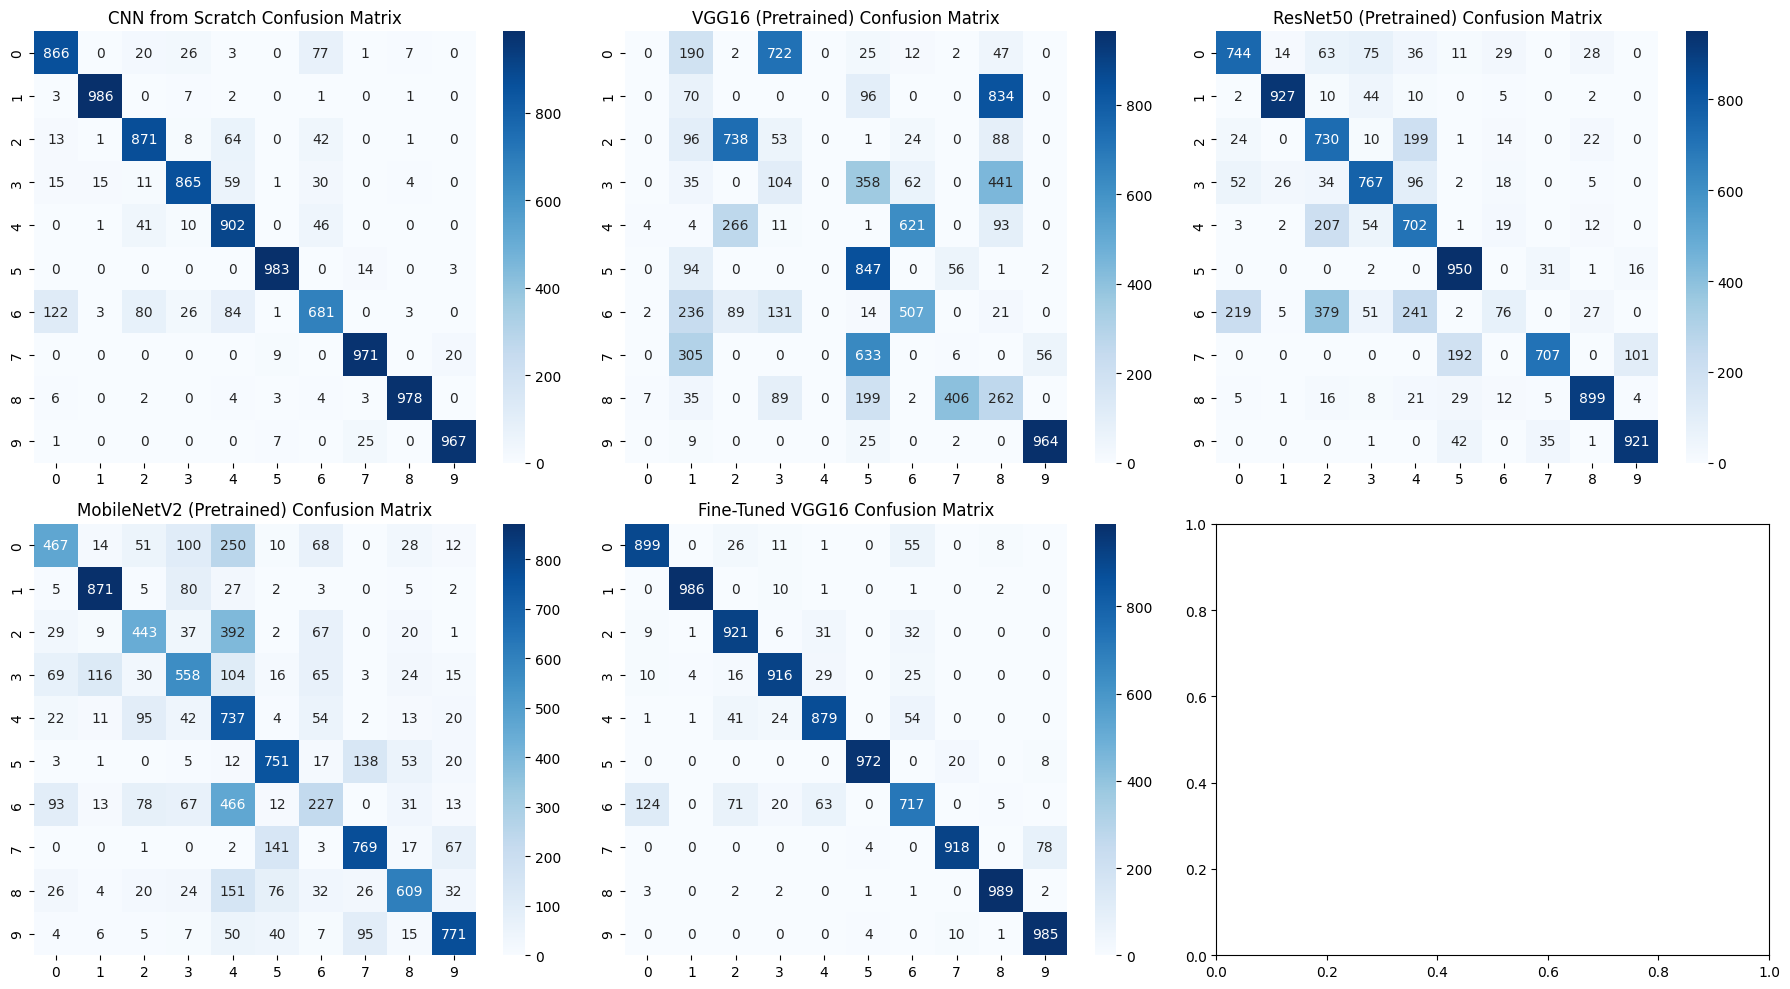

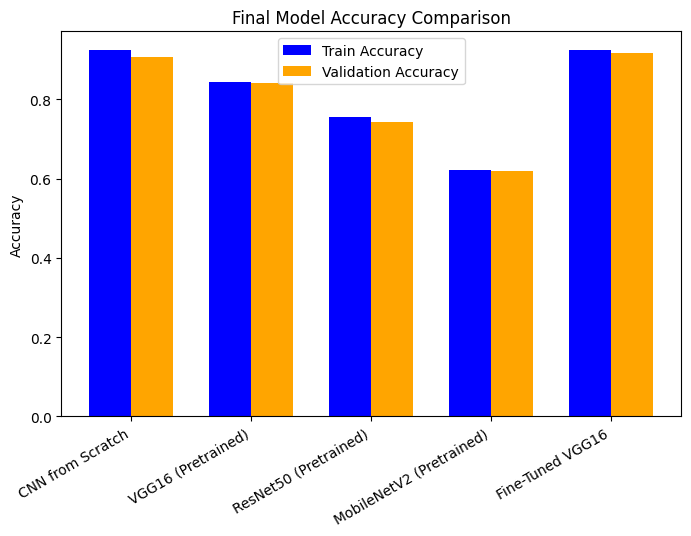

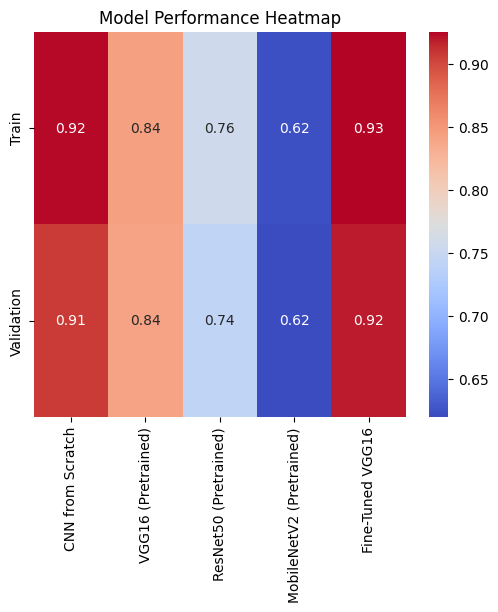

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import applications
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
from sklearn.metrics import confusion_matrix

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Expand dimensions (28,28,1) for grayscale images
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Convert grayscale images to 3-channel (RGB) for pretrained models
x_train = np.repeat(x_train, 3, axis=-1)
x_test = np.repeat(x_test, 3, axis=-1)

# Resize images from 28x28 to 32x32 (required for VGG16, ResNet50, MobileNetV2)
x_train = tf.image.resize(x_train, (32, 32))
x_test = tf.image.resize(x_test, (32, 32))

# Normalize pixel values to range [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoding (10 classes)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Function to build, train, and store training history
def train_model(model, name, epochs=5):
    history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test), batch_size=64, verbose=1)
    return {"name": name, "history": history, "model": model}

# CNN from Scratch
cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_history = train_model(cnn_model, "CNN from Scratch")

# VGG16 (Pretrained)
vgg16_base = applications.VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
vgg16_base.trainable = False
vgg16_model = keras.Sequential([vgg16_base, keras.layers.GlobalAveragePooling2D(), keras.layers.Dense(10, activation='softmax')])
vgg16_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
vgg16_history = train_model(vgg16_model, "VGG16 (Pretrained)")

# ResNet50 (Pretrained)
resnet50_base = applications.ResNet50(weights='imagenet', include_top=False, input_shape=(32,32,3))
resnet50_base.trainable = False
resnet50_model = keras.Sequential([resnet50_base, keras.layers.GlobalAveragePooling2D(), keras.layers.Dense(10, activation='softmax')])
resnet50_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resnet50_history = train_model(resnet50_model, "ResNet50 (Pretrained)")

# MobileNetV2 (Pretrained)
mobilenet_base = applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(32,32,3))
mobilenet_base.trainable = False
mobilenet_model = keras.Sequential([mobilenet_base, keras.layers.GlobalAveragePooling2D(), keras.layers.Dense(10, activation='softmax')])
mobilenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
mobilenet_history = train_model(mobilenet_model, "MobileNetV2 (Pretrained)")

# Fine-Tuned VGG16
for layer in vgg16_base.layers[:10]:  # Unfreeze first 10 layers
    layer.trainable = True
fine_tuned_vgg16 = keras.Sequential([
    vgg16_base,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])
fine_tuned_vgg16.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
fine_tuned_vgg16_history = train_model(fine_tuned_vgg16, "Fine-Tuned VGG16")

# List of models
models = [cnn_history, vgg16_history, resnet50_history, mobilenet_history, fine_tuned_vgg16_history]
model_names = [m["name"] for m in models]

# Extract final accuracies
final_train_acc = [m["history"].history["accuracy"][-1] for m in models]
final_val_acc = [m["history"].history["val_accuracy"][-1] for m in models]

# Confusion Matrices for Each Model
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()
for i, model in enumerate(models):
    y_pred = np.argmax(model["model"].predict(x_test), axis=1)
    y_true = np.argmax(y_test, axis=1)
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(f"{model['name']} Confusion Matrix")
plt.tight_layout()
plt.show()

# Bar Chart - Final Accuracy Comparison
plt.figure(figsize=(8, 5))
x = np.arange(len(model_names))
width = 0.35
plt.bar(x - width/2, final_train_acc, width, label="Train Accuracy", color="blue")
plt.bar(x + width/2, final_val_acc, width, label="Validation Accuracy", color="orange")
plt.xticks(x, model_names, rotation=30, ha="right")
plt.ylabel("Accuracy")
plt.title("Final Model Accuracy Comparison")
plt.legend()
plt.show()

# Heatmap - Training vs. Validation Accuracy
plt.figure(figsize=(6, 5))
accuracy_matrix = np.array([final_train_acc, final_val_acc])
sns.heatmap(accuracy_matrix, annot=True, cmap="coolwarm", xticklabels=model_names, yticklabels=["Train", "Validation"])
plt.title("Model Performance Heatmap")
plt.show()


# **Task 4 : Conclusion and Result Visulaization**



# **Comparative Analysis of Models**

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import applications
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import cv2
import time

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape for CNN from Scratch (Grayscale)
x_train_gray = x_train.reshape(-1, 28, 28, 1)
x_test_gray = x_test.reshape(-1, 28, 28, 1)

# Resize to (32,32,3) for Pretrained Models (VGG16, ResNet50, MobileNetV2)
x_train_rgb = np.array([cv2.resize(img, (32, 32)) for img in x_train])
x_train_rgb = np.stack([x_train_rgb] * 3, axis=-1)  # Convert grayscale to RGB

x_test_rgb = np.array([cv2.resize(img, (32, 32)) for img in x_test])
x_test_rgb = np.stack([x_test_rgb] * 3, axis=-1)  # Convert grayscale to RGB

# Convert labels to categorical (one-hot encoding)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Function to train and evaluate models
def evaluate_model(model, name, x_train, x_test, epochs=5):
    start_time = time.time()
    history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test), batch_size=64, verbose=1)
    end_time = time.time()

    # Evaluate model performance
    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

    # Store model details
    return {
        "Model": name,
        "Accuracy (%)": round(accuracy * 100, 2),
        "Loss": round(loss, 4),
        "Parameters": model.count_params(),
        "Training Time (s)": round(end_time - start_time, 2)
    }

# CNN from Scratch
cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_results = evaluate_model(cnn_model, "CNN from Scratch", x_train_gray, x_test_gray)

# VGG16 (Pretrained)
vgg16_base = applications.VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
vgg16_base.trainable = False  # Freeze layers
vgg16_model = keras.Sequential([vgg16_base, keras.layers.GlobalAveragePooling2D(), keras.layers.Dense(10, activation='softmax')])
vgg16_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
vgg16_results = evaluate_model(vgg16_model, "VGG16 (Pretrained)", x_train_rgb, x_test_rgb)

# ResNet50 (Pretrained)
resnet50_base = applications.ResNet50(weights='imagenet', include_top=False, input_shape=(32,32,3))
resnet50_base.trainable = False
resnet50_model = keras.Sequential([resnet50_base, keras.layers.GlobalAveragePooling2D(), keras.layers.Dense(10, activation='softmax')])
resnet50_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resnet50_results = evaluate_model(resnet50_model, "ResNet50 (Pretrained)", x_train_rgb, x_test_rgb)

# MobileNetV2 (Pretrained)
mobilenet_base = applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(32,32,3))
mobilenet_base.trainable = False
mobilenet_model = keras.Sequential([mobilenet_base, keras.layers.GlobalAveragePooling2D(), keras.layers.Dense(10, activation='softmax')])
mobilenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
mobilenet_results = evaluate_model(mobilenet_model, "MobileNetV2 (Pretrained)", x_train_rgb, x_test_rgb)

# Fine-Tuned VGG16
for layer in vgg16_base.layers[:10]:  # Unfreeze last few layers for fine-tuning
    layer.trainable = True
fine_tuned_vgg16 = keras.Sequential([
    vgg16_base,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])
fine_tuned_vgg16.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
fine_tuned_vgg16_results = evaluate_model(fine_tuned_vgg16, "Fine-Tuned VGG16", x_train_rgb, x_test_rgb)

# Create DataFrame for results
df = pd.DataFrame([cnn_results, vgg16_results, resnet50_results, mobilenet_results, fine_tuned_vgg16_results])

# Print results
print("\n🔹 Comparative Analysis of Models:\n")
print(df)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7485 - loss: 0.7051 - val_accuracy: 0.8699 - val_loss: 0.3662
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8805 - loss: 0.3255 - val_accuracy: 0.8917 - val_loss: 0.3018
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8987 - loss: 0.2732 - val_accuracy: 0.8962 - val_loss: 0.2842
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9122 - loss: 0.2366 - val_accuracy: 0.8892 - val_loss: 0.2937
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9211 - loss: 0.2117 - val_accuracy: 0.8954 - val_loss: 0.2852
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.6771 - loss: 1.0982 - val_accuracy: 0.8031 - val_loss: 0.5888
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.8091 - loss: 0.5579 - val_accuracy: 0.8194 - val_loss: 0.5187
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.8266 - loss: 0.4902 - val_accuracy: 0.83

<ipython-input-6-16f9df5d7fc8>:78: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet_base = applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(32,32,3))


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.4407 - loss: 1.8124 - val_accuracy: 0.5932 - val_loss: 1.2885
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6023 - loss: 1.2379 - val_accuracy: 0.6093 - val_loss: 1.1607
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6161 - loss: 1.1344 - val_accuracy: 0.6134 - val_loss: 1.1137
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.6208 - loss: 1.0943 - val_accuracy: 0.6182 - val_loss: 1.0897
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6247 - loss: 1.0720 - val_accuracy: 0.6219 - val_loss: 1.0754
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 36s 34ms/step - accuracy: 0.6891 - loss: 0.8932 - val_accuracy: 0.8752 - val_loss: 0.3591
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.8809 - loss: 0.3391 - val_accuracy: 0.8923 - val_loss: 0.3030
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.9014 - loss: 0.2819 - val_accuracy: 

# **Task 5 : Declaration**

I Ganesh Atre, confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

GitHub Repository Link:

Signature: Mayur Ashok Kapgate